In [316]:
import pandas as pd
import os,h5py
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline  

os.chdir('/data/arpit.goel/20_TwoSigmaFinancial')

In [315]:
! tar -cvf  /home/arpit.goel/pydata.tar /home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test

tar: Removing leading `/' from member names
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/Untitled.ipynb
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/examples/
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/examples/AmazonReviews.ipynb
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/examples/sklearn_examples.ipynb
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/examples/Baseball.ipynb
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/examples/BostonHousingData.ipynb
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/environment.yml
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/images/
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/images/crossvalidation.png
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/03_pydata_test/images/accuracy.png
/home/arpit.goel/arpit.goel/10_JupyterNotebooks/

In [311]:
df = pd.read_hdf('01.RawData/train.h5')
print df.columns.tolist()


[u'id', u'timestamp', u'derived_0', u'derived_1', u'derived_2', u'derived_3', u'derived_4', u'fundamental_0', u'fundamental_1', u'fundamental_2', u'fundamental_3', u'fundamental_5', u'fundamental_6', u'fundamental_7', u'fundamental_8', u'fundamental_9', u'fundamental_10', u'fundamental_11', u'fundamental_12', u'fundamental_13', u'fundamental_14', u'fundamental_15', u'fundamental_16', u'fundamental_17', u'fundamental_18', u'fundamental_19', u'fundamental_20', u'fundamental_21', u'fundamental_22', u'fundamental_23', u'fundamental_24', u'fundamental_25', u'fundamental_26', u'fundamental_27', u'fundamental_28', u'fundamental_29', u'fundamental_30', u'fundamental_31', u'fundamental_32', u'fundamental_33', u'fundamental_34', u'fundamental_35', u'fundamental_36', u'fundamental_37', u'fundamental_38', u'fundamental_39', u'fundamental_40', u'fundamental_41', u'fundamental_42', u'fundamental_43', u'fundamental_44', u'fundamental_45', u'fundamental_46', u'fundamental_47', u'fundamental_48', u'fun

In [312]:
print df.shape

(1710756, 111)


In [230]:
df.y.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.99])

count    1710756.000000
mean           0.000222
std            0.022406
min           -0.086094
1%            -0.071777
5%            -0.033492
10%           -0.022030
25%           -0.009561
50%           -0.000157
75%            0.009521
90%            0.022716
95%            0.035116
99%            0.078022
max            0.093498
Name: y, dtype: float64

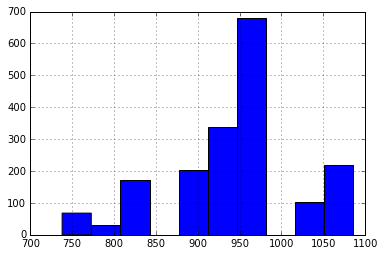

In [313]:
df.groupby('timestamp')['y'].count().hist()


In [47]:
def get_stats(df):
    stats = OrderedDict()
    stats['count'] = df.y.shape[0]
    stats['mean'] = df.y.mean()
    stats['std'] = df.y.std()
    stats['mintime'] = df.timestamp.min()
    stats['maxtime'] = df.timestamp.max()
    stats['timespan'] = stats['maxtime']-stats['mintime']
    stats['TimePointsDelta'] = stats['timespan']+1-stats['count']
    return pd.Series(stats)

df.groupby('id')[['timestamp','y']].apply(get_stats).to_csv('02.Profiling/01.IdProfile.csv')

In [62]:
signal_means = df.groupby('id').std()/np.abs(df.groupby('id').mean())
signal_means.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.99]).to_csv('02.Profiling/02.SignalsVariance.csv')

In [101]:
df1 = df[['id','timestamp','y']]

def get_correlation_matrix(name,inputdf1,inputdf2):
    inputdf = pd.merge(inputdf1,inputdf2,on='timestamp')
    inputdf = pd.DataFrame(inputdf.groupby(['id_x','id_y']).apply(lambda x: x[['y_x','y_y']].corr().values[1,0]),columns=['correlation'])
    print name
    return inputdf.unstack()
    
corr_matrix = pd.concat([get_correlation_matrix(name,group,df1) for name, group in df1.groupby('id')])


0
6
7
10
11
12
13
14
15
16
17
18
19
20
22
23
24
25
26
27
30
31
32
33
38
39
40
41
43
44
46
47
48
49
52
54
55
56
58
59
60
62
63
64
65
66
68
69
70
72
76
77
79
80
81
82
83
85
87
88
90
91
93
95
97
98
99
100
101
102
103
104
105
106
108
111
112
113
115
118
119
121
122
124
126
127
128
129
130
131
132
133
134
137
140
141
142
149
150
151
152
154
156
158
159
160
161
163
166
169
170
171
172
173
174
175
176
177
178
179
181
183
184
185
186
187
188
191
195
198
199
203
205
206
208
212
214
215
216
217
218
219
220
221
222
223
224
225
226
227
229
231
232
233
235
239
240
241
242
244
245
248
249
252
253
255
256
257
258
259
261
262
264
265
266
268
269
270
271
273
274
275
277
278
279
280
281
284
285
286
287
288
289
290
294
295
296
297
298
300
302
303
304
305
306
307
308
310
312
316
317
318
319
321
324
325
329
330
333
334
338
339
340
341
343
344
346
347
348
349
351
352
353
355
356
357
358
361
362
363
364
365
366
369
372
374
377
378
379
380
381
382
383
384
386
388
389
391
392
393
395
396
397
398
399
400
402
40

In [105]:
corr_matrix.unstack().describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    1819236.000000
mean           0.033923
std            0.134721
min           -1.000000
1%            -0.274245
5%            -0.130635
10%           -0.085726
25%           -0.028003
50%            0.027030
75%            0.085177
90%            0.157982
95%            0.223886
99%            0.475574
max            1.000000
dtype: float64

/data/arpit.goel/anacondainstall/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/data/arpit.goel/anacondainstall/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/arpit.goel/anacondainstall/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/d

          y_x       y_y
y_x  1.000000  0.102534
y_y  0.102534  1.000000
            y_smooth_x  y_smooth_y
y_smooth_x    1.000000    0.139707
y_smooth_y    0.139707    1.000000


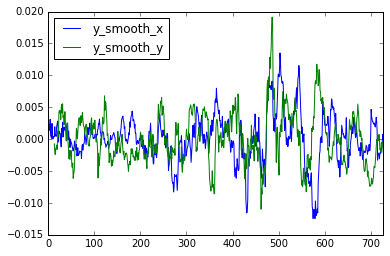

In [142]:
df1=df[df['id']==0]
df1.sort_values(by='timestamp',inplace=True)

df2=df[df['id']==6]
df2.sort_values(by='timestamp',inplace=True)
df1['y_smooth']=pd.rolling_mean(df1['y'],14)
df2['y_smooth']=pd.rolling_mean(df2['y'],14)

df_join = pd.merge(df1[['timestamp','y_smooth','y']],df2[['timestamp','y_smooth','y']],on='timestamp')

print df_join[['y_x','y_y']].corr()
print df_join[['y_smooth_x','y_smooth_y']].corr()
df_join[['y_smooth_x','y_smooth_y']].plot()


In [140]:
df1=df[df['id']==11]
df2=df[df['id']==12]

print df1[['id','timestamp','y']]
print df2[['id','timestamp','y']]

         id  timestamp         y
1        11          0 -0.001240
751      11          1 -0.002024
1501     11          2  0.008788
2251     11          3 -0.006551
3001     11          4 -0.004336
3751     11          5 -0.022718
4501     11          6 -0.035710
5251     11          7 -0.024840
6001     11          8  0.022319
6751     11          9  0.006719
7501     11         10  0.043820
8251     11         11 -0.001312
9001     11         12 -0.008244
9750     11         13  0.006344
10499    11         14 -0.002810
11248    11         15  0.015916
11997    11         16  0.012601
12745    11         17 -0.005490
13493    11         18 -0.006853
14240    11         19 -0.010980
14987    11         20 -0.002113
15734    11         21  0.005275
16481    11         22 -0.026182
17228    11         23 -0.042873
17975    11         24  0.004542
18721    11         25 -0.018335
19466    11         26  0.008639
20211    11         27 -0.015243
20955    11         28 -0.006563
21699    1

In [109]:
corr_matrix.unstack()[corr_matrix.unstack()>0.1]

             id_y  id_x
correlation  0     0       1.000000
                   6       0.102534
                   7       0.108336
                   12      0.114480
                   20      0.192050
                   22      0.144860
                   23      0.114291
                   24      0.117325
                   25      0.150214
                   32      0.186175
                   38      0.153001
                   52      0.115993
                   63      0.196622
                   70      0.255831
                   90      0.122994
                   101     0.125188
                   104     0.125011
                   106     0.115892
                   121     0.154574
                   128     0.114623
                   137     0.183362
                   158     0.100867
                   173     0.330975
                   176     0.103503
                   178     0.111585
                   185     0.113033
                   221     0.133729
    

In [158]:
smooth_window = 5


In [208]:
from scipy.sparse.csgraph import connected_components
    
def get_group_count(smooth_window,corr_threshold,group_threshold):
    corr_matrix = pd.read_csv('02.Profiling/03.Corr_%d.csv'%smooth_window)
    corr_matrix.index=pd.MultiIndex.from_arrays(corr_matrix[['id_x','id_y']].values.T)
    adjacency_matrix = corr_matrix[['correlation']].unstack().fillna(0)
    securities = adjacency_matrix.index
    adjacency_matrix = np.where(adjacency_matrix>corr_threshold,1,0)
    component = connected_components(adjacency_matrix)
    security_tagging = pd.DataFrame(zip(securities,component[1]),columns=['id','group'])
    security_tagging['group_count']=security_tagging['group'].map(security_tagging['group'].value_counts())
    security_tagging['group_new']=np.where(security_tagging['group_count']>=group_threshold,security_tagging['group'],-1)
    return security_tagging['group_new'].value_counts().shape[0]

group_threshold=50
output=[]
#for smooth_window in [1,3,5,10,20,30]:
for smooth_window in [1]:
    for corr_threshold in [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
        num_groups=get_group_count(smooth_window,corr_threshold,group_threshold)
        output.append([smooth_window,corr_threshold,num_groups])
        
pd.DataFrame(output,columns=['AveragingWindow','CorrelationThreshold','NumGroups'])

,AveragingWindow,CorrelationThreshold,NumGroups
0,1,0.05,1
1,1,0.10,1
2,1,0.20,1
3,1,0.25,1
4,1,0.30,2
5,1,0.40,2
6,1,0.50,2
7,1,0.60,2
8,1,0.70,2
9,1,0.80,2


In [213]:
def get_groups(smooth_window,corr_threshold,group_threshold):
    corr_matrix = pd.read_csv('02.Profiling/03.Corr_%d.csv'%smooth_window)
    corr_matrix.index=pd.MultiIndex.from_arrays(corr_matrix[['id_x','id_y']].values.T)
    adjacency_matrix = corr_matrix[['correlation']].unstack().fillna(0)
    securities = adjacency_matrix.index
    adjacency_matrix = np.where(adjacency_matrix>corr_threshold,1,0)
    print adjacency_matrix.sum(),adjacency_matrix.shape
    component = connected_components(adjacency_matrix)
    security_tagging = pd.DataFrame(zip(securities,component[1]),columns=['id','group'])
    security_tagging['group_count']=security_tagging['group'].map(security_tagging['group'].value_counts())
    security_tagging['group_new']=np.where(security_tagging['group_count']>=group_threshold,security_tagging['group'],-1)
    return security_tagging['group_new'].value_counts()

smooth_window=1
group_threshold=50
corr_threshold=0.9

get_groups(smooth_window,corr_threshold,group_threshold)

 4374 (1424, 1424)


 0    814
-1    610
Name: group_new, dtype: int64

In [244]:
from sklearn.cluster import SpectralClustering

def get_clusters(smooth_window,n_clusters):
    corr_matrix = pd.read_csv('02.Profiling/03.Corr_%d.csv'%smooth_window)
    corr_matrix.index=pd.MultiIndex.from_arrays(corr_matrix[['id_x','id_y']].values.T)
    adjacency_matrix = (corr_matrix[['correlation']].unstack().fillna(0)+1)/2.0
    securities = adjacency_matrix.index
    label = SpectralClustering(n_clusters=n_clusters,affinity='precomputed').fit_predict(adjacency_matrix) 
    security_tagging = pd.DataFrame(zip(securities,label),columns=['id','group'])
    security_tagging['group_count']=security_tagging.groupby(['group'])['id'].transform(np.size)
    security_tagging['group']=np.where(security_tagging['group_count']<100,security_tagging['group'].value_counts().index[0],security_tagging['group'])
    return security_tagging['group'].value_counts().shape[0]
    
cluster_summary = [[smooth_window,n_clusters,get_clusters(smooth_window,n_clusters)] for smooth_window in [1,3,5,10,20,30] for n_clusters in range(3,8)]
cluster_summary = pd.DataFrame(cluster_summary,columns=['window','clusters1','clusters2'])

In [251]:
cluster_summary.groupby(['window','clusters2'])['clusters1'].agg([np.size,np.max]).reset_index().sort_values(by='size',ascending=False)


,window,clusters2,size,amax
2,1,5,3,8
7,3,6,3,9
12,5,7,2,9
22,20,6,2,7
1,1,4,2,5
6,3,5,2,7
14,10,4,2,5
10,5,5,2,6
0,1,3,1,3
23,20,7,1,8


In [160]:
#pd.MultiIndex.from_tuples(corr_matrix[['id_x','id_y']].columns.values)

corr_matrix.index=pd.MultiIndex.from_arrays(corr_matrix[['id_x','id_y']].values.T)
corr_matrix1 = corr_matrix[['correlation']].unstack().fillna(0)

In [257]:
def tag_entities(var1,n_clusters,smooth_window=3):
    corr_matrix = pd.read_csv('03.ProcessedData/01.Corr_%s%d.csv'%(var1,smooth_window))
    corr_matrix.index=pd.MultiIndex.from_arrays(corr_matrix[['%s_x'%var1,'%s_y'%var1]].values.T)
    adjacency_matrix = (corr_matrix[['correlation']].unstack().fillna(0)+1)/2.0
    securities = adjacency_matrix.index
    label = SpectralClustering(n_clusters=n_clusters,affinity='precomputed').fit_predict(adjacency_matrix) 
    security_tagging = pd.DataFrame(zip(securities,label),columns=[var1,'group'])
    security_tagging['group_count']=security_tagging.groupby(['group'])[var1].transform(np.size)
    #security_tagging['group']=np.where(security_tagging['group_count']<100,security_tagging['group'].value_counts().index[0],security_tagging['group'])
    security_tagging[[var1,'group']].to_csv('03.ProcessedData/02.Tagging_%s.csv'%var1,index=False)
    return security_tagging.groupby(['group'])[var1].count()
    return security_tagging['group'].drop_duplicates().shape[0]

#pd.DataFrame([[x,tag_entities('timestamp',x)] for x in range(3,11)])

for x in range(3,20):
    print x,tag_entities('timestamp',x)

3 group
0    699
1    506
2    606
Name: timestamp, dtype: int64
4 group
0    449
1    510
2    452
3    400
Name: timestamp, dtype: int64
5 group
0    321
1    388
2    328
3    439
4    335
Name: timestamp, dtype: int64
6 group
0    321
1    267
2    259
3    366
4    307
5    291
Name: timestamp, dtype: int64
7 group
0    276
1    246
2    271
3    208
4    230
5    261
6    319
Name: timestamp, dtype: int64
8 group
0    235
1    267
2    311
3    220
4    177
5    173
6    248
7    180
Name: timestamp, dtype: int64
9 group
0    180
1    213
2    164
3    218
4    214
5    173
6    229
7    229
8    191
Name: timestamp, dtype: int64
10 group
0    142
1    167
2    199
3    183
4    162
5    223
6    154
7    154
8    229
9    198
Name: timestamp, dtype: int64
11 group
0     171
1     174
2     141
3     159
4     181
5     161
6     143
7     144
8     193
9     171
10    173
Name: timestamp, dtype: int64
12 group
0     128
1     208
2     177
3     147
4     128
5     147
6     104

In [264]:
cols = [x for x in df.columns.tolist() if x not in ['timestamp','id']][:3]

percentiles=df[cols].quantile([0.05,0.95])
floor=np.where(percentiles.ix[0.05]<0,2.5*percentiles.ix[0.05],percentiles.ix[0.05]/2.5)
ceil=np.where(percentiles.ix[0.95]>0,2.5*percentiles.ix[0.95],percentiles.ix[0.95]/2.5)
print floor, ceil

[-2.38055345 -0.13161643 -3.3244139 ] [ 1.68711033  2.4369368   2.86700797]


In [273]:
def get_stats(indata,cols):
    percentiles=indata[cols].quantile([0.05,0.95])
    percentiles.ix[0.05]=np.where(percentiles.ix[0.05]<0,2.5*percentiles.ix[0.05],percentiles.ix[0.05]/2.5)
    percentiles.ix[0.95]=np.where(percentiles.ix[0.95]>0,2.5*percentiles.ix[0.95],percentiles.ix[0.95]/2.5)
    return indata[cols].clip(percentiles.ix[0.05],percentiles.ix[0.95],axis=0).describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.99])

cols = [x for x in df.columns.tolist() if x not in ['timestamp','id']][:3]
get_stats(df,cols)

,derived_0,derived_1,derived_2
count,0,0,0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
1%,NaN,NaN,NaN
5%,NaN,NaN,NaN
10%,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN


In [285]:
#df.groupby(['timestamp','id'])['y'].max().unstack().to_csv('02.Profiling/AssetValueTimeSeriex.csv')
df[(df['id']==11)|(df['id']==12)].to_csv('02.Profiling/id_11_12.csv')

In [292]:
miss_rate=df.groupby('timestamp').apply(lambda x:x.isnull().sum()/x.shape[0])
cols=[x for x in df.columns.tolist() if x not in ['id','timestamp','y']]
#for col in cols:
    #plt.figure()
    #miss_rate[col].plot()
    
df.isnull().sum().sort_values()



id                     0
technical_34           0
technical_22           0
y                      0
timestamp              0
technical_7         2236
technical_40        2236
technical_21        2236
technical_19        2320
technical_27        2420
technical_36        2552
technical_35        3155
technical_2         4279
technical_6         4279
technical_11        4279
technical_17        4279
technical_43        4686
technical_13        4764
technical_20        4764
technical_30        4764
fundamental_33     13835
technical_14       14184
technical_33       14535
fundamental_18     15833
fundamental_48     15843
fundamental_36     15843
fundamental_59     16062
fundamental_45     16062
technical_12       19165
technical_32       19165
                   ...  
fundamental_14    356084
fundamental_23    356723
fundamental_2     368840
fundamental_55    368840
fundamental_56    368840
fundamental_11    368840
fundamental_8     373166
fundamental_63    375614
fundamental_39    377574


In [296]:
technical_cols=[x for x in df.columns.tolist() if 'technical' in x]


df[technical_cols].isnull().groupby(df.id).sum().max().sort_values()

technical_22       0
technical_34       0
technical_40       4
technical_7        4
technical_21       4
technical_20       9
technical_30       9
technical_13       9
technical_19      20
technical_33      22
technical_41      43
technical_24      63
technical_27      72
technical_3       83
technical_1      104
technical_36     122
technical_5      124
technical_31     144
technical_25     164
technical_35     167
technical_44     185
technical_28     204
technical_0      760
technical_32     760
technical_12     760
technical_38     760
technical_37     760
technical_9      760
technical_42     872
technical_2      872
technical_6      872
technical_39     872
technical_18     872
technical_11     872
technical_16     872
technical_17     872
technical_43     872
technical_14    1813
technical_29    1813
technical_10    1813
dtype: float64

In [307]:
df_11=df[df['id']==11]

X=np.fft.fft(df_11['fundamental_53'].dropna().values)
(abs(X)**2).sum()


(29416.968902526638+5.3660187404602766e-11j)

In [309]:
X=df_11[['fundamental_53']].dropna().values
np.linalg.eigvals(X)

LinAlgError: Last 2 dimensions of the array must be square

In [321]:
df.notnull().sum(axis=0).to_csv('02.Profiling/08.VariableMissRate.csv')

In [323]:
df.groupby('timestamp')['y'].agg([np.size,np.mean,np.std]).to_csv('02.Profiling/08.TimeStampMean.csv')